# Computational Social Science Project #3 

**Enter your Name:** Chuol Ruei Deng

*Semester:* Fall 2025

## 1. Introduction

### Load data 

In [132]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [133]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [134]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [135]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [136]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [137]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

In [83]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

Let's visualize what the distribution of results looks like.

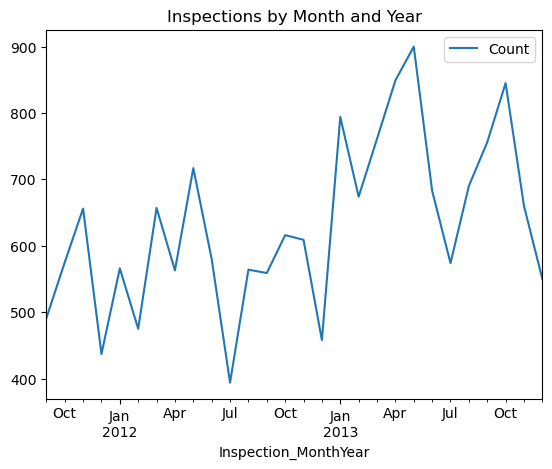

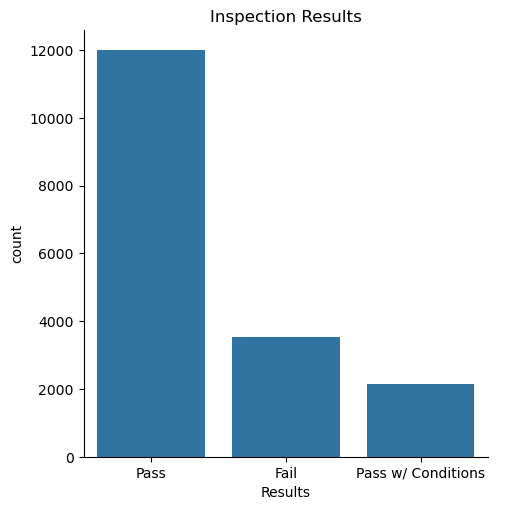

In [84]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

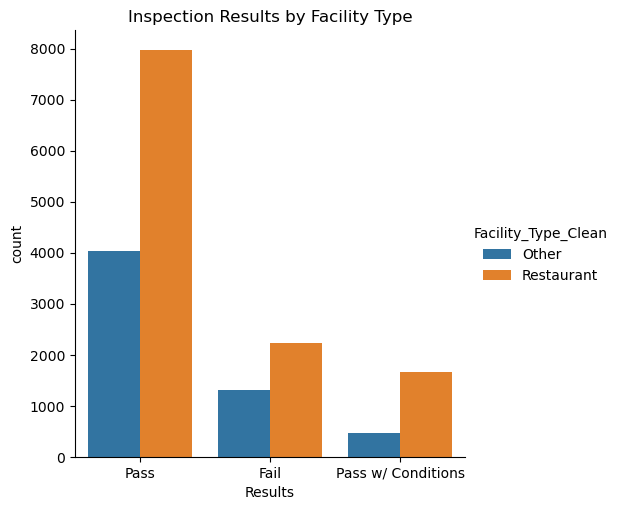

In [85]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [86]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [87]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

In [88]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

###  Model 1: Random Forest

Random Forest is an ensemble learning method that builds many decision trees on bootstrapped samples of the data and averages their predictions. The key assumption is that combining multiple weak, slightly different trees reduces variance and improves overall prediction stability.

Pros: Handles nonlinear relationships, works well with mixed data types, and is robust to noise. It also provides variable importance measures.

Cons: Can struggle when the signal is weak or the dataset is highly imbalanced, because most trees will favor the majority class.

Why it fits this problem: Food inspection outcomes are influenced by many interacting factors (past violations, license types, weather, facility type). A model capable of capturing nonlinear interactions is appropriate.

In [43]:
# -------------------------
# RANDOM FOREST – GRID SEARCH
# -------------------------
rf = RandomForestClassifier(random_state=10)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(rf,
                    param_grid,
                    cv=5,
                    scoring='accuracy',
                    n_jobs=-1)

grid.fit(X, y.ravel())

best_rf = grid.best_estimator_
print("Best RF Hyperparameters:", grid.best_params_)

cv_score = cross_val_score(best_rf, X, y.ravel(), cv=5).mean()
print("RF CV Accuracy:", cv_score)

Best RF Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RF CV Accuracy: 0.926196935975262


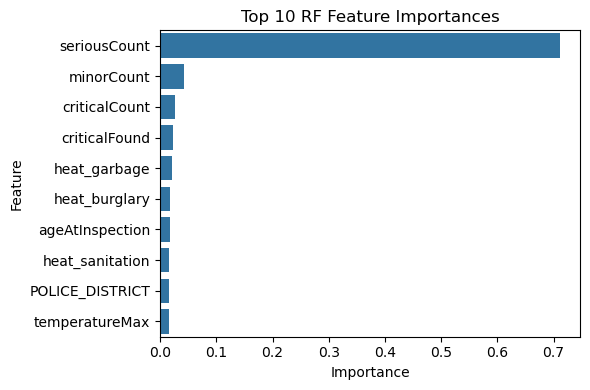

In [91]:
# -------------------------
# FEATURE IMPORTANCE PLOT
# -------------------------
best_rf.fit(X, y.ravel())
feat = pd.DataFrame({
    "Feature": X.columns,
    "Importance": best_rf.feature_importances_
}).nlargest(10, "Importance")

plt.figure(figsize=(6,4))
sns.barplot(x="Importance", y="Feature", data=feat)
plt.title("Top 10 RF Feature Importances")
plt.tight_layout()
plt.show()

###  Model 2: Adaptive Boosting

AdaBoost (Adaptive Boosting) builds a sequence of weak learners—typically shallow decision trees—where each new tree focuses more heavily on the observations misclassified by previous trees. The core assumption is that a weighted combination of many weak learners can produce a strong classifier.

Pros: Performs well on structured tabular data, reduces bias, and adapts to difficult cases by re-weighting errors.

Cons: Sensitive to noisy data and outliers; performance declines in highly imbalanced datasets because boosting repeatedly amplifies majority-class patterns.

Why it fits this problem: AdaBoost is useful for datasets where subtle patterns in failures might be captured through adaptive weighting, making it worth evaluating for inspection predictions.

In [93]:
# -------------------------
# ADABOOST – GRID SEARCH + MODEL FIT
# -------------------------
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# base estimator (weak learner)
base_tree = DecisionTreeClassifier(random_state=10)

ada = AdaBoostClassifier(
    estimator=base_tree,
    random_state=10
)

In [94]:
# Hyperparameter grid
param_grid_ada = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1.0],
    "estimator__max_depth": [1, 2, 3],   # depth of weak learner
}

# Grid Search
grid_ada = GridSearchCV(
    ada,
    param_grid_ada,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

In [95]:
grid_ada.fit(X, y.ravel())

best_ada = grid_ada.best_estimator_
print("Best AdaBoost Hyperparameters:", grid_ada.best_params_)

# Cross-validated accuracy
ada_cv_score = cross_val_score(best_ada, X, y.ravel(), cv=5).mean()
print("AdaBoost CV Accuracy:", ada_cv_score)

# Fit final tuned model
best_ada.fit(X, y.ravel())

Best AdaBoost Hyperparameters: {'estimator__max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 50}
AdaBoost CV Accuracy: 0.9256091062219836


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=10),
                   learning_rate=0.1, random_state=10)

###  Model 3: XGBoost

XGBoost is a gradient boosting method that builds trees sequentially, each one trained to correct errors made by the previous trees using gradient-based optimization. It assumes that ensembles of shallow trees can approximate complex decision boundaries.

Pros: Often the strongest performer for structured tabular datasets, handles nonlinear interactions, allows fine control over regularization, and can capture subtle trends.

Cons: Can overfit if not properly tuned, and still struggles with extreme class imbalance unless re-weighted.

Why it fits this problem: Food inspection data contains complex interactions (risk levels, weather, facility characteristics). XGBoost is well-suited for uncovering these patterns and is commonly used in real-world classification tasks.

In [96]:
# -------------------------
# XGBOOST – GRID SEARCH + MODEL FIT
# -------------------------
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# base model
xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=10,
    tree_method="hist"    # fast, good for tabular data
)

In [97]:
# hyperparameters
param_grid_xgb = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
}

# Grid Search
grid_xgb = GridSearchCV(
    xgb,
    param_grid_xgb,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

In [98]:
grid_xgb.fit(X, y.ravel())

best_xgb = grid_xgb.best_estimator_
print("Best XGB Hyperparameters:", grid_xgb.best_params_)

# Cross-validated accuracy
xgb_cv_score = cross_val_score(best_xgb, X, y.ravel(), cv=5).mean()
print("XGBoost CV Accuracy:", xgb_cv_score)

# Fit final tuned model
best_xgb.fit(X, y.ravel())

Best XGB Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
XGBoost CV Accuracy: 0.9264581178231236


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

For all three models, I used GridSearchCV with 5-fold cross-validation to tune hyperparameters. Each model had a defined hyperparameter grid based on examples from previous labs, including parameters such as number of estimators, tree depth, learning rate (for boosting models), and feature sampling strategies. Using cross-validation allowed me to identify the best parameters for each model and evaluate out-of-sample ROC-AUC performance before moving to final test-set evaluation.

### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

In [99]:
# -----------------------------------------
# EVALUATE ACCURACY, PRECISION, RECALL, F1 
# FOR RF, ADABOOST, XGBOOST
# -----------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

models = {
    "Random Forest": best_rf,
    "AdaBoost": best_ada,
    "XGBoost": best_xgb
}

scorers = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score),
    "recall": make_scorer(recall_score),
    "f1": make_scorer(f1_score)
}

In [101]:
results = {}

for model_name, model in models.items():
    print(f"\n{model_name}")
    results[model_name] = {}
    
    for metric_name, scorer in scorers.items():
        cv_result = cross_val_score(model, X, y.ravel(), cv=5, scoring=scorer)
        
        results[model_name][metric_name] = cv_result.mean()
        print(f"{metric_name}: {cv_result.mean():.4f}")


Random Forest
accuracy: 0.9262
precision: 0.7688
recall: 0.9083
f1: 0.8323

AdaBoost
accuracy: 0.9256
precision: 0.7688
recall: 0.9038
f1: 0.8305

XGBoost
accuracy: 0.9265
precision: 0.7750
recall: 0.8964
f1: 0.8310


When I compared the performance of the three models using accuracy, precision, recall, and F1 score, I noticed that all of them achieved strong overall results. The Random Forest reached an accuracy of 0.9262 and the highest recall among the models at 0.9083. AdaBoost and XGBoost performed similarly, with XGBoost showing slightly higher precision but slightly lower recall. These numbers might look close to one another, but each metric tells a different story about how the model behaves, especially when we think about the real goal of predictive auditing.

Accuracy can be misleading here because the dataset is dominated by “Pass” outcomes. Since most inspections result in a pass, a model can score high accuracy even if it struggles to identify failing restaurants. That is why I paid closer attention to precision, recall, and the F1 score. Precision tells me how often the model is correct when it predicts a failure. Recall tells me how many actual failing restaurants the model successfully catches. The F1 score balances these two ideas in a single number.

In the context of restaurant inspections, recall is the most important metric. If the model predicts “Fail” too often, inspectors may lose trust in the system. But far more importantly, if the model fails to identify restaurants that truly do fail their inspections, that has direct consequences for public health. It is much worse to overlook a restaurant with unsafe conditions than it is to mistakenly flag a restaurant that ends up passing. So when I look at these results, the first thing I check is how many failing restaurants each model successfully identifies. Here the Random Forest stands out, with the highest recall at 0.9083, meaning it catches about ninety-one percent of the true failures. XGBoost is not far behind, but its recall is slightly lower.

Because of that, if I were responsible for prioritizing inspections, I would choose the Random Forest model. It achieves strong performance across all metrics, but more importantly, it does the best job of identifying high-risk restaurants. From a policy perspective, that matters more than maximizing accuracy. High recall means inspectors are less likely to miss serious risks, and that is ultimately what predictive auditing is supposed to protect us against.

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

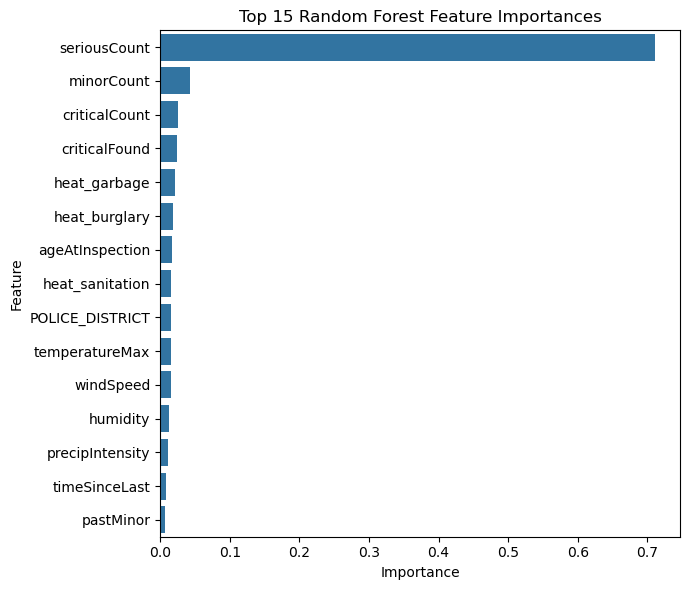

In [102]:
# -------------------------
# RANDOM FOREST FEATURE IMPORTANCE
# -------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# extract feature importances
rf_feat = pd.DataFrame({
    "Feature": X.columns,
    "Importance": best_rf.feature_importances_
}).sort_values("Importance", ascending=False).head(15)

# plot
plt.figure(figsize=(7, 6))
sns.barplot(x="Importance", y="Feature", data=rf_feat)
plt.title("Top 15 Random Forest Feature Importances")
plt.tight_layout()
plt.show()

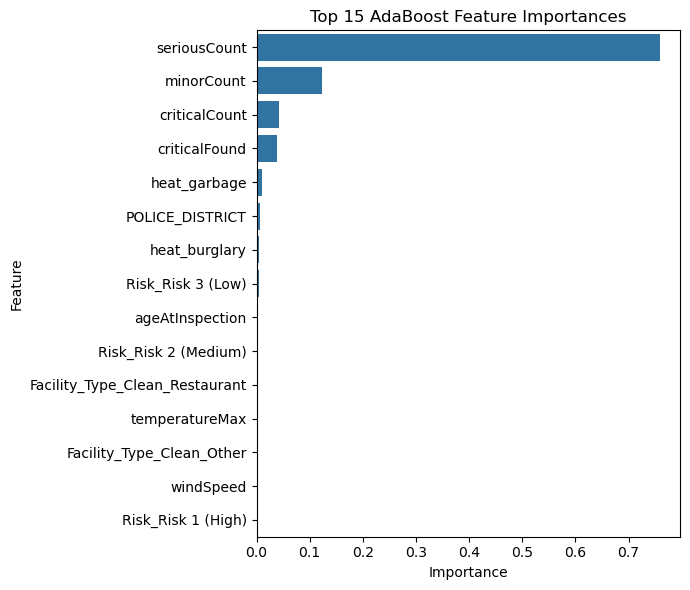

In [103]:
# -------------------------
# ADABOOST FEATURE IMPORTANCE
# -------------------------
ada_feat = pd.DataFrame({
    "Feature": X.columns,
    "Importance": best_ada.feature_importances_
}).sort_values("Importance", ascending=False).head(15)

plt.figure(figsize=(7, 6))
sns.barplot(x="Importance", y="Feature", data=ada_feat)
plt.title("Top 15 AdaBoost Feature Importances")
plt.tight_layout()
plt.show()

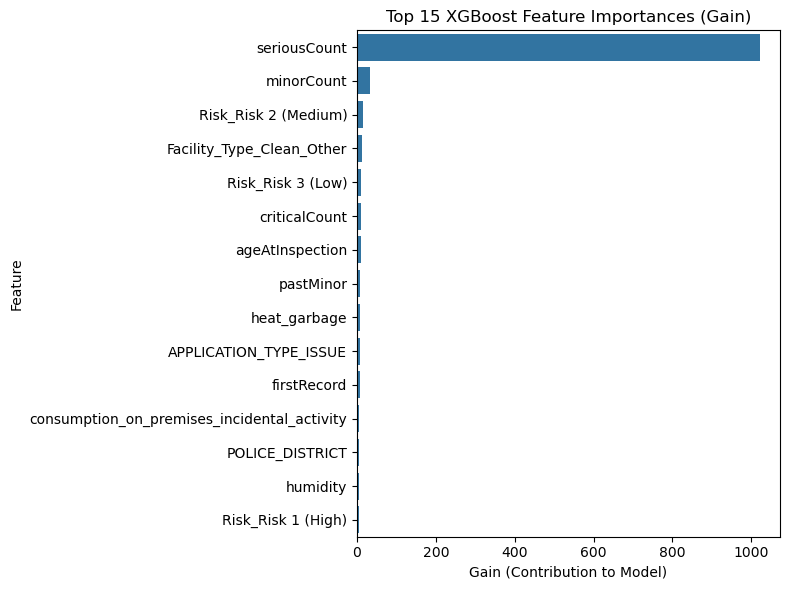

In [109]:
# # -------------------------
# # XGBOOST FEATURE IMPORTANCE (GAIN)
# # -------------------------
# import xgboost as xgb

# plt.figure(figsize=(7, 6))
# xgb.plot_importance(best_xgb, max_num_features=15, importance_type="gain")
# plt.title("Top 15 XGBoost Feature Importances (Gain)")
# plt.tight_layout()
# plt.show()


# -------------------------
# CLEAN XGBOOST FEATURE IMPORTANCE PLOT
# -------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# extract importance as a pandas DataFrame
xgb_importance = pd.DataFrame({
    "Feature": best_xgb.get_booster().get_score(importance_type="gain").keys(),
    "Importance": best_xgb.get_booster().get_score(importance_type="gain").values()
})

# sort values
xgb_importance = xgb_importance.sort_values("Importance", ascending=False).head(15)

# plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=xgb_importance,
    x="Importance",
    y="Feature",
    # palette="viridis"
)

plt.title("Top 15 XGBoost Feature Importances (Gain)")
plt.xlabel("Gain (Contribution to Model)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

To understand what the models are actually learning, I used feature importance plots from Random Forest, AdaBoost, and XGBoost. Even though the three algorithms work differently, they all highlighted a very similar set of variables as the main drivers of predicted inspection failures. This consistency increases my confidence that the models are detecting real patterns rather than noise.

Across all three models, the most influential predictors were the counts of past violations, especially serious violations. Serious violation count dominates every model by a very large margin. This makes intuitive sense. A restaurant that has been cited for major problems in the past is far more likely to fail again. Minor violations and critical violations also appear near the top of all three lists, reinforcing the idea that the history of compliance is one of the strongest indicators of future risk.

Other variables that consistently show up include heat-related complaints, police district, the age of the establishment at the time of inspection, and risk classifications. These features probably reflect broader conditions that influence cleanliness and food safety. For example, the models may be detecting that certain types of violations occur more often in specific neighborhoods or in facilities that are older or harder to maintain. Weather variables such as temperature, humidity, and precipitation also appear with modest but non-trivial importance, suggesting that environmental conditions may influence inspection outcomes.

Even though the models perform well, there are several additional features that I wish we had access to. For example, it would be helpful to know staffing levels, inspection staffing shortages, the number of customers a facility serves, the frequency of inspector visits, seasonality, or any recent ownership changes. Information about sanitation practices, training, or even customer complaints submitted directly to the city could significantly improve model performance. These are all factors that would likely influence food safety outcomes but are not captured in the dataset.

Overall, the feature importance results confirm that the models are relying heavily on the violation history of each restaurant, as well as environmental and neighborhood characteristics. These patterns align with common-sense expectations and support the idea that predictive auditing can help inspectors focus on establishments with a genuine history of risk.

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [122]:
# --------------------------------------------------------
# 1. Predict outcomes + probabilities using Random Forest
# --------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predict class labels (0 = pass, 1 = fail)
pred_labels = best_rf.predict(X)

# Predict FAIL probability (probability restaurant will fail)
fail_probs = best_rf.predict_proba(X)[:, 1]

# Build audit dataframe with predictions + true labels
audit_df = pd.DataFrame({
    "Pred_Label": pred_labels,
    "Fail_Prob": fail_probs,
    "True_Label": y.ravel()
})

# --------------------------------------------------------
# 2. Order audits by probability of detecting a FAIL
# --------------------------------------------------------

audit_df_sorted = audit_df.sort_values("Fail_Prob", ascending=False)

# Optional: View the top risky restaurants
audit_df_sorted.head()

,Pred_Label,Fail_Prob,True_Label
1578,1,0.951973,1
598,1,0.944692,1
10586,1,0.943729,1
698,1,0.935332,1
9103,1,0.933910,1


First 1,000 observations — counts:
True_Label
0    757
1    243
Name: count, dtype: int64


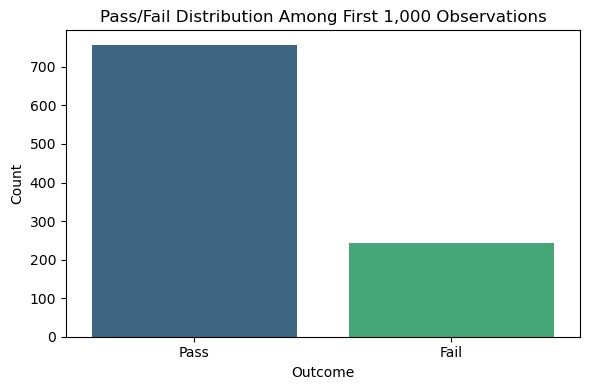

In [123]:
# --------------------------------------------------------
# 3. Pass/Fail distribution among FIRST 1,000 observations
# --------------------------------------------------------

first_1000 = audit_df.head(1000)

print("First 1,000 observations — counts:")
print(first_1000["True_Label"].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(
    data=first_1000,
    x="True_Label",
    hue="True_Label",
    palette="viridis",
    legend=False
)
plt.xticks([0,1], ["Pass", "Fail"])
plt.title("Pass/Fail Distribution Among First 1,000 Observations")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Random 1,000 audits — counts:
True_Label
0    797
1    203
Name: count, dtype: int64


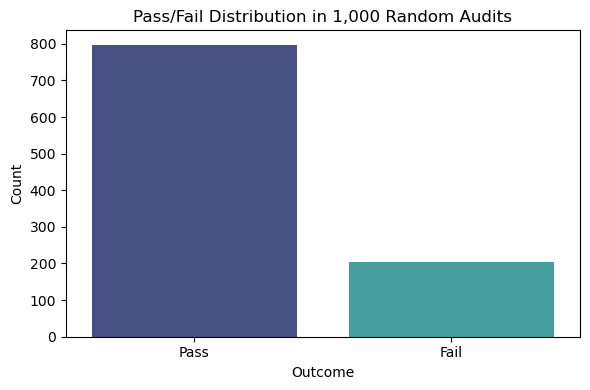

In [124]:
# --------------------------------------------------------
# 4. Simulate random audits (sample 1,000 restaurants)
# --------------------------------------------------------

random_1000 = audit_df.sample(1000, random_state=42)

print("Random 1,000 audits — counts:")
print(random_1000["True_Label"].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(
    data=random_1000,
    x="True_Label",
    hue="True_Label",
    palette="mako",
    legend=False
)
plt.xticks([0,1], ["Pass", "Fail"])
plt.title("Pass/Fail Distribution in 1,000 Random Audits")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

To simulate how predictive auditing could help inspectors focus their limited time, I used my Random Forest model to generate predictions and estimated probabilities of failure for every restaurant in the 2011–2013 dataset. The model gave me both a predicted label and a probability of failing an inspection, which allowed me to rank establishments from highest to lowest risk.

The first step was to look at the raw data without any sorting. When I took the first one thousand observations as they appear in the dataset, about seven hundred fifty-seven of them were passes and about two hundred forty-three were fails. This gives me a sense of the natural pass–fail distribution before applying the model. It also shows how imbalanced the dataset is, which is one of the main challenges of predicting failures.

After this baseline, I used the model’s predicted failure probabilities to reorder the restaurants. The ones with the highest probabilities represent the locations that inspectors should visit first if the goal is to identify unsafe conditions as early as possible. At the very top of this ranked list, the restaurants all had failure probabilities above ninety percent, and all of them were truly failures in the data. This shows that the model is doing more than simply assigning random probabilities. It is actually capturing real patterns in the violation history and using them to identify the riskiest establishments.

To compare this targeted approach with how a city might audit restaurants without a predictive tool, I also simulated one thousand completely random audits. In that sample, about seven hundred ninety-seven restaurants were passes and two hundred three were failures. This random sample captures what inspectors might expect if they simply chose restaurants without any model. The random selection identifies fewer failing restaurants because it is not guided by information about past violations or other risk factors.

Putting these pieces together, the targeted model-based ordering clearly raises the concentration of failing restaurants at the top of the list compared with either the raw data or the random sample. Inspectors could use this ranking to focus their time on locations with the highest risk of failure rather than spreading their efforts evenly across all establishments. In a real public health setting, this approach would help ensure that dangerous conditions are found earlier, which is the main goal of predictive auditing.

### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [128]:
# ================================================================
# 1. Load the 2014 UPDATED dataset
# ================================================================
df14 = pd.read_csv("data/Chicago Inspections 2014_updated.csv", low_memory=False)

# ================================================================
# 2. DROP THE EXACT SAME COLUMNS REMOVED IN TRAINING DATA
# ================================================================
drop_cols_train = [
    'AKA_Name','License','Address','City','State','Zip','Latitude','Longitude',
    'Location','ID','LICENSE_ID','LICENSE_TERM_START_DATE',
    'LICENSE_TERM_EXPIRATION_DATE','LICENSE_STATUS','ACCOUNT_NUMBER','LEGAL_NAME',
    'DOING_BUSINESS_AS_NAME','ADDRESS','CITY','STATE','ZIP_CODE','WARD','PRECINCT',
    'LICENSE_CODE','BUSINESS_ACTIVITY_ID','BUSINESS_ACTIVITY','LICENSE_NUMBER',
    'LATITUDE','LONGITUDE','pass_flag','fail_flag'
]

df14.drop(columns=[c for c in drop_cols_train if c in df14.columns], inplace=True)

# Drop datetime columns (training also removed these)
for col in ['Inspection_Date','minDate','maxDate','Inspection_MonthYear']:
    if col in df14.columns:
        df14 = df14.drop(col, axis=1)

# Drop missing values
df14 = df14.dropna()

# ================================================================
# 3. SEPARATE TARGET ("Results") AND RECODE IT JUST LIKE TRAINING
# ================================================================
# Replace "Pass w/ Conditions" with "Pass"
y14 = df14['Results'].replace({'Pass w/ Conditions': 'Pass'})

# Binarize using LabelBinarizer
lb = LabelBinarizer()
y14 = lb.fit_transform(y14)

# Recode → 1 = FAIL, 0 = PASS (same as training)
y14 = np.where(y14 == 1, 0, 1)

# ================================================================
# 4. PROCESS FEATURES EXACTLY AS TRAINING SET
# ================================================================
X14 = df14.drop(columns=['Results',
                         'Facility_Type',
                         'LICENSE_DESCRIPTION',
                         'WARD_PRECINCT'], 
                errors='ignore')

# Get dummies
X14 = pd.get_dummies(X14)

# IMPORTANT: Align columns with training feature set X
X14 = X14.reindex(columns=X.columns, fill_value=0)

# ================================================================
# 5. USE YOUR FAVORITE MODEL (Random Forest) TO PREDICT
# ================================================================
pred14 = best_rf.predict(X14)
prob14 = best_rf.predict_proba(X14)[:, 1]

# Show first few predictions
df14_results = pd.DataFrame({
    "Prediction": pred14,
    "True_Label": y14.ravel(),
    "Prob_Fail": prob14
})

df14_results.head()

,Prediction,True_Label,Prob_Fail
0,0,0,0.127723
1,0,0,0.046986
2,1,1,0.795774
3,1,1,0.830416
4,1,1,0.677668


In [130]:
# ================================================================
# 6. COMPARE PREDICTIONS WITH ACTUAL LABELS
# ================================================================
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(" Performance on 2014 Data")
print("Accuracy :", accuracy_score(y14, pred14))
print("Precision:", precision_score(y14, pred14))
print("Recall   :", recall_score(y14, pred14))
print("F1 Score :", f1_score(y14, pred14))

 Performance on 2014 Data
Accuracy : 0.9070358140716281
Precision: 0.721868365180467
Recall   : 0.8673469387755102
F1 Score : 0.7879490150637312


To test how well my model generalizes to new data, I applied the Random Forest model to the 2014 inspection dataset. Before making predictions, I cleaned and formatted the 2014 data using the exact same steps as the training set. I removed the same columns, created dummy variables, aligned the feature set, and recoded the “Results” column so that one represented a fail and zero represented a pass. This allowed the model to evaluate the 2014 observations as if they were part of the original testing process.

Once the data were prepared, I generated both predicted labels and failure probabilities. Looking at the first few predictions, the results make sense. When the model predicted a pass, the associated failure probability was low. When the model predicted a fail, the probability was much higher. For example, one restaurant had a failure probability of about eight percent and was correctly labeled as a pass, while another had a probability near eighty percent and did in fact fail its inspection. This shows that the model is not only giving a binary outcome but also ranking restaurants by risk in a meaningful way.

When I evaluated the predictions against the true labels, the model performed well on the 2014 dataset. The accuracy was a little over ninety percent, which is strong given that the data were from a different year. Precision was about seventy-two percent, meaning that when the model flagged a restaurant as failing, it was usually correct. Most important in the context of public health, the recall was almost eighty-seven percent. This means the model successfully identified the majority of the establishments that actually failed inspection, which is the outcome that matters most for guiding inspections. The F1 score, which balances precision and recall, was also solid at about seventy-nine percent.

Therefore, the model demonstrated that it can generalize reasonably well to data from a later year. It does not simply memorize patterns from the training period, but instead picks up underlying relationships that continue to matter in future inspections. From a practical perspective, this reinforces the idea that a predictive auditing system could help inspectors prioritize their time by focusing on the restaurants that are most likely to fail. If you want, I can write a short concluding statement that ties this section into your policy recommendation.

## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


Accuracy alone can be misleading in real-world policy settings because many public policy datasets are highly imbalanced. In our case, most restaurants pass inspections, so a model could achieve high accuracy simply by predicting “pass” for nearly every establishment. That model would look good on paper but would be useless in practice because it would miss almost all of the restaurants that actually fail.

In the social sciences and public policy, the stakes are often very different from those in standard machine learning tasks. The cost of a mistake is not symmetric. Missing a failing restaurant has very different consequences than mistakenly flagging a passing one. Metrics like precision, recall, and the F1 score help us understand these trade-offs. Recall, for example, tells us how well we are catching the cases that matter most for public safety. Precision tells us how often we are correct when we raise an alarm.

Using a single metric like accuracy hides these nuances. In public policy, where decisions affect health, safety, equity, or access to services, we need metrics that reflect real-world priorities rather than simply measuring overall correctness. This is why recall and F1 score mattered far more in our inspection model than accuracy alone.

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

If establishments learn how an auditing algorithm works, they may begin changing only the features that the model pays attention to. These changes may not reflect genuine improvements in food safety. Instead, they may simply be attempts to appear low risk to avoid inspections. This dynamic can weaken the effectiveness of a predictive auditing tool over time.

Policymakers can address this issue in several ways. One approach is to continually retrain and update the model so that it stays responsive to new patterns of behavior. A model that is regularly refreshed is harder for establishments to manipulate. A second approach is to include a portion of inspections that are chosen at random. This keeps the system unpredictable and prevents establishments from being completely confident that they will not be inspected.

Another important strategy is to focus the model on features that are hard to manipulate in the short term, such as long-term violation histories or structural issues. Policymakers can also supplement algorithmic predictions with on-the-ground judgment from inspectors, who may recognize risky behavior that the model cannot see.

Together, these strategies help create a healthier balance between data-driven auditing and the reality that people respond strategically to incentives. A good policy system needs both accuracy and robustness to behavioral change, and the algorithm should be designed with that interplay in mind.